In [119]:
#Importing basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
#importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report


In [121]:
data=pd.read_csv('/content/cumulative.csv')    #importing the Kepler dataset

In [122]:
data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [123]:
data.shape #getting the shape of dataset

(9564, 50)

In [124]:
#Taking the required data

data=data[data['koi_disposition']!='CANDIDATE']   #removed the rows where 'CANDIDATE' is present
data.shape

(7316, 50)

In [125]:
data=data.reset_index(drop=False)      #resetting index values
data.drop(columns='index',inplace=True)   #dropping the old index column

In [126]:
#Analysising dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              7316 non-null   int64  
 1   kepid              7316 non-null   int64  
 2   kepoi_name         7316 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    7316 non-null   object 
 5   koi_pdisposition   7316 non-null   object 
 6   koi_score          6257 non-null   float64
 7   koi_fpflag_nt      7316 non-null   int64  
 8   koi_fpflag_ss      7316 non-null   int64  
 9   koi_fpflag_co      7316 non-null   int64  
 10  koi_fpflag_ec      7316 non-null   int64  
 11  koi_period         7316 non-null   float64
 12  koi_period_err1    6939 non-null   float64
 13  koi_period_err2    6939 non-null   float64
 14  koi_time0bk        7316 non-null   float64
 15  koi_time0bk_err1   6939 non-null   float64
 16  koi_time0bk_err2   6939 

In [127]:
data.describe()  #acquiring mathematical info from the columns

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,7316.000000,7.316000e+03,6257.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,6.939000e+03,6.939000e+03,...,6904.000000,7016.000000,6919.000000,6919.000000,7016.000000,6919.000000,6919.000000,7316.000000,7316.000000,7315.000000
mean,4729.992482,7.659114e+06,0.360384,0.246036,0.298387,0.254784,0.156916,58.816738,2.123294e-03,-2.123294e-03,...,-164.975956,4.303516,0.122608,-0.142696,1.779288,0.372944,-0.417607,292.143301,43.767705,14.242005
std,2803.978558,2.655142e+06,0.467090,0.430729,0.457582,0.435770,0.363747,121.082398,8.495847e-03,8.495847e-03,...,75.744604,0.444626,0.134387,0.083503,6.203126,1.014582,2.263816,4.744932,3.599717,1.406877
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,1.100000e-08,-1.725000e-01,...,-1762.000000,0.047000,0.000000,-1.007000,0.116000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2288.750000,5.521112e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.237412,3.481000e-06,-1.758000e-04,...,-199.000000,4.206750,0.043000,-0.196000,0.829000,0.128500,-0.258000,288.839360,40.718053,13.407000
50%,4819.500000,7.848890e+06,0.000000,0.000000,0.000000,0.000000,0.000000,8.507657,2.163000e-05,-2.163000e-05,...,-162.000000,4.438000,0.071000,-0.130000,1.000000,0.252000,-0.112000,292.306975,43.596432,14.483000
75%,7191.250000,9.851644e+06,0.996000,0.000000,1.000000,1.000000,0.000000,36.184630,1.758000e-04,-3.481000e-06,...,-117.000000,4.543000,0.152500,-0.089500,1.367000,0.365000,-0.069000,295.931460,46.692538,15.302000
max,9564.000000,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1071.232624,1.725000e-01,-1.100000e-08,...,0.000000,5.283000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


**Getting values of X (input data):**

In [128]:
#Obtaining the input data for training the model

X=data.drop(columns=['rowid','koi_disposition','koi_pdisposition','koi_teq_err1','koi_teq_err2'])
X.head()

,kepid,kepoi_name,kepler_name,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,1.000,0,0,0,0,9.488036,2.775000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,0.969,0,0,0,0,54.418383,2.479000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,0.000,0,1,0,0,19.899140,1.494000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,0.000,0,1,0,0,1.736952,2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,1.000,0,0,0,0,2.525592,3.761000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [129]:
#seperating float in 'kepoi_name'
X['kepoi_num']=X['kepoi_name'].str.split('K',expand=True)[1].astype(float)

#Seperating int and alpha in 'kepler_name'
a=X['kepler_name'].str.split('-',expand=True)[1]
X['kepler_num']=a.str.split(' ',expand=True)[0].astype(float)

X['kepler_var']=a.str.split(' ',expand=True)[1]

In [130]:
#dropping 'kepoi_name' & 'kepler_name' columns

X.drop(columns=['kepler_name','kepoi_name'],inplace=True)


In [131]:
#Applying OneHot encoding on object type columns

#for 'koi_tce_delivname' column
ohe=OneHotEncoder(drop='first',sparse=False)
ab=ohe.fit_transform(X[['koi_tce_delivname']])
ab=pd.DataFrame(ab,columns=ohe.get_feature_names_out(['koi_tce_delivname']))

#for 'kepler_var' column
ac=ohe.fit_transform(X[['kepler_var']])
ac=pd.DataFrame(ac,columns=ohe.get_feature_names_out(['kepler_var']))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [132]:
ab.head()

,koi_tce_delivname_q1_q17_dr24_tce,koi_tce_delivname_q1_q17_dr25_tce,koi_tce_delivname_nan
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [133]:
ac.head()

,kepler_var_b,kepler_var_c,kepler_var_d,kepler_var_e,kepler_var_f,kepler_var_g,kepler_var_h,kepler_var_nan
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
X=pd.concat([X,ab,ac],axis=1)   #concatenating the encoded columns with X
X.drop(columns=['koi_tce_delivname','kepler_var'],inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   kepid                              7316 non-null   int64  
 1   koi_score                          6257 non-null   float64
 2   koi_fpflag_nt                      7316 non-null   int64  
 3   koi_fpflag_ss                      7316 non-null   int64  
 4   koi_fpflag_co                      7316 non-null   int64  
 5   koi_fpflag_ec                      7316 non-null   int64  
 6   koi_period                         7316 non-null   float64
 7   koi_period_err1                    6939 non-null   float64
 8   koi_period_err2                    6939 non-null   float64
 9   koi_time0bk                        7316 non-null   float64
 10  koi_time0bk_err1                   6939 non-null   float64
 11  koi_time0bk_err2                   6939 non-null   float

In [135]:
X2=X.copy()    #making a copy of X

In [136]:
X.shape   #getting the shape of X

(7316, 55)

**Scaling and Imputation in the input dataset (X)**

In [137]:
#Scaling X first

sc=StandardScaler()      #using standardscaler
X=sc.fit_transform(X)
X=pd.DataFrame(X,columns=X2.columns)

In [138]:
# Now imputing the NaN value using Iterative imputer

it=IterativeImputer()
X=it.fit_transform(X)
X=pd.DataFrame(X,columns=X2.columns)
X.head()    #the input dataset is ready!!

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_tce_delivname_q1_q17_dr25_tce,koi_tce_delivname_nan,kepler_var_b,kepler_var_c,kepler_var_d,kepler_var_e,kepler_var_f,kepler_var_g,kepler_var_h,kepler_var_nan
0,1.182069,1.369473,-0.571247,-0.652141,-0.584716,-0.431418,-0.407426,-0.246673,0.246673,0.086238,...,0.411401,-0.199117,1.869186,-0.249891,-0.147122,-0.088613,-0.048261,-0.016536,-0.011692,-1.479591
1,1.182069,1.303099,-0.571247,-0.652141,-0.584716,-0.431418,-0.036328,-0.220758,0.220758,-0.036015,...,0.411401,-0.199117,-0.534992,4.001744,-0.147122,-0.088613,-0.048261,-0.016536,-0.011692,-1.479591
2,1.187355,-0.771613,-0.571247,1.533412,-0.584716,-0.431418,-0.321436,-0.248181,0.248181,0.167154,...,0.411401,-0.199117,-0.534992,-0.249891,-0.147122,-0.088613,-0.048261,-0.016536,-0.011692,0.675863
3,1.201278,-0.771613,-0.571247,1.533412,-0.584716,-0.431418,-0.471445,-0.249908,0.249908,0.082716,...,0.411401,-0.199117,-0.534992,-0.249891,-0.147122,-0.088613,-0.048261,-0.016536,-0.011692,0.675863
4,1.203574,1.369473,-0.571247,-0.652141,-0.584716,-0.431418,-0.464931,-0.249497,0.249497,0.102337,...,0.411401,-0.199117,1.869186,-0.249891,-0.147122,-0.088613,-0.048261,-0.016536,-0.011692,-1.479591


**Getting the target data (Y):**

In [139]:
le=LabelEncoder()   #encoding the target dataset
Y=le.fit_transform(data['koi_disposition'])
Y

array([0, 0, 1, ..., 1, 1, 1])

**---------------------Training the data----------------------------**

In [140]:
X.shape,Y.shape    #getting the shape of both X & Y

((7316, 55), (7316,))

In [141]:
#Doing train_test_split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [142]:
print(X_train.shape,X_test.shape,'\n',Y_train.shape,Y_test.shape)

(5121, 55) (2195, 55) 
 (5121,) (2195,)


**Traing and testing using Support Vector Machine algo (SVM)**

In [143]:
#-------Using SVM algo-------------

#using GridSearchCV to find the best parameters and best score
clf=GridSearchCV(SVC(gamma='auto'),{'C':[5,10,15,30,35,50],'kernel':['rbf','linear','poly','sigmoid'
                                  ]}, cv=10, return_train_score=False)
clf.fit(X_train,Y_train)
clf.best_score_, clf.best_params_

(1.0, {'C': 5, 'kernel': 'linear'})

In [144]:
pd.DataFrame(clf.cv_results_).iloc[:,[6,17,19]]

,params,mean_test_score,rank_test_score
0,"{'C': 5, 'kernel': 'rbf'}",0.999023,12
1,"{'C': 5, 'kernel': 'linear'}",1.000000,1
2,"{'C': 5, 'kernel': 'poly'}",0.999023,12
3,"{'C': 5, 'kernel': 'sigmoid'}",0.997266,19
4,"{'C': 10, 'kernel': 'rbf'}",0.999023,12
5,"{'C': 10, 'kernel': 'linear'}",1.000000,1
6,"{'C': 10, 'kernel': 'poly'}",0.999609,10
7,"{'C': 10, 'kernel': 'sigmoid'}",0.996289,20
8,"{'C': 15, 'kernel': 'rbf'}",0.999023,12
9,"{'C': 15, 'kernel': 'linear'}",1.000000,1


In [145]:
#predicting the output and testing

svm=SVC(C=5,kernel='linear')
svm.fit(X_train,Y_train)

Y_pred_svm=svm.predict(X_test)

accuracy_score(Y_test,Y_pred_svm)*100   #checking the accuracy score

99.95444191343964

In [146]:
target_names=['CONFIRMED','FALSE POSITIVE']
print(classification_report(Y_test,Y_pred_svm,target_names=target_names))  #Classification report


                precision    recall  f1-score   support

     CONFIRMED       1.00      1.00      1.00       688
FALSE POSITIVE       1.00      1.00      1.00      1507

      accuracy                           1.00      2195
     macro avg       1.00      1.00      1.00      2195
  weighted avg       1.00      1.00      1.00      2195



**Training and testing using Logistic Regression:**

In [147]:
#--------Using Logistic Regression

#using GridSearchCV to find the best parameters and best score
clfl=GridSearchCV(LogisticRegression(max_iter=1000),{'C':[1,2,4,5,100,200,300,500,800,1000]},cv=10,return_train_score=False)
clfl.fit(X_train,Y_train)

clfl.best_score_, clfl.best_params_

(1.0, {'C': 1})

In [148]:
pd.DataFrame(clfl.cv_results_).iloc[:,[5,16,18]]

,params,mean_test_score,rank_test_score
0,{'C': 1},1.0,1
1,{'C': 2},1.0,1
2,{'C': 4},1.0,1
3,{'C': 5},1.0,1
4,{'C': 100},1.0,1
5,{'C': 200},1.0,1
6,{'C': 300},1.0,1
7,{'C': 500},1.0,1
8,{'C': 800},1.0,1
9,{'C': 1000},1.0,1


In [149]:
lr=LogisticRegression(C=1)
lr.fit(X_train,Y_train)
Y_pred_lr=lr.predict(X_test)

accuracy_score(Y_test,Y_pred_lr)*100  #accuracy score

99.95444191343964

In [150]:
values=['CONFIRMED','FALSE POSITIVE']
print(classification_report(Y_test,Y_pred_lr,target_names=values)) #Classification report

                precision    recall  f1-score   support

     CONFIRMED       1.00      1.00      1.00       688
FALSE POSITIVE       1.00      1.00      1.00      1507

      accuracy                           1.00      2195
     macro avg       1.00      1.00      1.00      2195
  weighted avg       1.00      1.00      1.00      2195



**Training and testing using RandomForestClassifier:**

In [151]:
#----------------using RandomForestClassifier----------------------------

#using GridSearchCV to find the best parameters
clfr=GridSearchCV(RandomForestClassifier(),{'n_estimators':[10,50,100,200],
                    'criterion':['gini','entropy']},cv=5,return_train_score=False)
clfr.fit(X_train,Y_train)

clfr.best_score_, clfr.best_params_


(1.0, {'criterion': 'gini', 'n_estimators': 10})

In [162]:
rf=RandomForestClassifier(criterion='gini',n_estimators=10)
rf.fit(X_train,Y_train)
Y_pred_rf=lr.predict(X_test)
accuracy_score(Y_test,Y_pred_rf)*100   #accuracy score

99.95444191343964

In [153]:
print(classification_report(Y_test,Y_pred_rf,target_names=values))  #classsification report

                precision    recall  f1-score   support

     CONFIRMED       1.00      1.00      1.00       688
FALSE POSITIVE       1.00      1.00      1.00      1507

      accuracy                           1.00      2195
     macro avg       1.00      1.00      1.00      2195
  weighted avg       1.00      1.00      1.00      2195



**Training and Testing using Naive Bayes Classifier:**

In [154]:
#-------using naive bayes classifier------------

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
cross_val_score(gnb,X_train,Y_train,cv=10).mean()   #cross validation score


1.0

In [155]:
gnb.fit(X_train,Y_train)
Y_pred_gnb=gnb.predict(X_test)
accuracy_score(Y_test,Y_pred_gnb)*100   #accuracy score

99.95444191343964

In [156]:
print(classification_report(Y_test,Y_pred_gnb,target_names=values))   #classification report

                precision    recall  f1-score   support

     CONFIRMED       1.00      1.00      1.00       688
FALSE POSITIVE       1.00      1.00      1.00      1507

      accuracy                           1.00      2195
     macro avg       1.00      1.00      1.00      2195
  weighted avg       1.00      1.00      1.00      2195



**Comparing all the model results:**

In [157]:
#using accuracy score
models = [svm,lr,rf,gnb ]
models_name = ['SVM','Logistic Regression','Random Forest','Naive Bayes']

for i in range(len(models)):
    models[i].fit(X_train, Y_train)

    print(f'{models_name[i]} : ')

    train_preds = models[i].predict(X_train)
    print('Training Accuracy : ',accuracy_score(Y_train, train_preds)*100)

    val_pred = models[i].predict(X_test)
    print('Validation Accuracy : ',accuracy_score(Y_test, val_pred)*100)
    print()

SVM : 
Training Accuracy :  100.0
Validation Accuracy :  99.95444191343964

Logistic Regression : 
Training Accuracy :  100.0
Validation Accuracy :  99.95444191343964

Random Forest : 
Training Accuracy :  100.0
Validation Accuracy :  99.90888382687928

Naive Bayes : 
Training Accuracy :  100.0
Validation Accuracy :  99.95444191343964



In [160]:
#Cross_val score validation

models = [svm,lr,rf,gnb ]
models_name = ['SVM','Logistic Regression','Random Forest','Naive Bayes']
from sklearn.model_selection import cross_val_score

def cv_score(model,a,b):          #definining a function 'cv_score'
   scores = cross_val_score(model, a, b, cv=5, scoring='accuracy')
   print("Cross-Validation Scores:", scores)
   print("Mean Cross-Validation Score:", scores.mean())

for i in range(len(models)):  #creating a loop to use the function on all models
    print(f'=================={models_name[i]}====================')
    cv_score(models[i],X_test,Y_test)
    print()



==================SVM====================
Cross-Validation Scores: [0.9977221 1.        0.9977221 1.        0.9977221]
Mean Cross-Validation Score: 0.9986332574031891

==================Logistic Regression====================
Cross-Validation Scores: [1.        1.        0.9977221 0.9977221 1.       ]
Mean Cross-Validation Score: 0.9990888382687928

==================Random Forest====================
Cross-Validation Scores: [0.99544419 1.         0.99544419 1.         0.9977221 ]
Mean Cross-Validation Score: 0.9977220956719817

==================Naive Bayes====================
Cross-Validation Scores: [1.        1.        0.9977221 1.        0.9977221]
Mean Cross-Validation Score: 0.9990888382687928



==================SVM====================
Accuracy: 0.9995
Precision: 0.9995
Recall: 0.9995
F1 Score: 0.9995


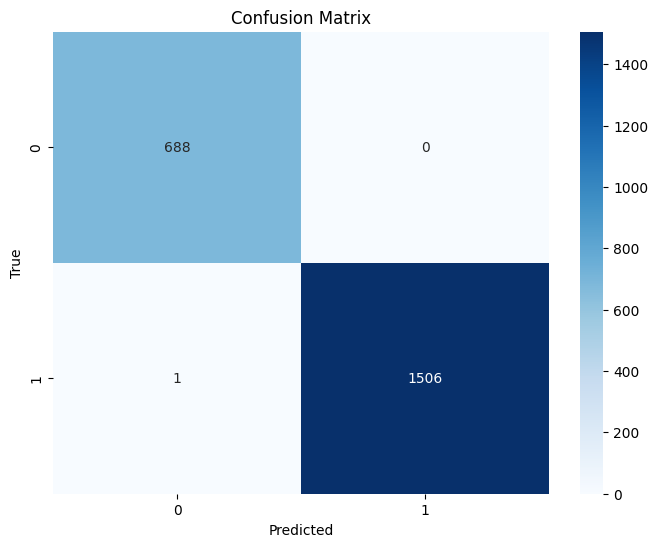


==================Logistic Regression====================
Accuracy: 0.9995
Precision: 0.9995
Recall: 0.9995
F1 Score: 0.9995


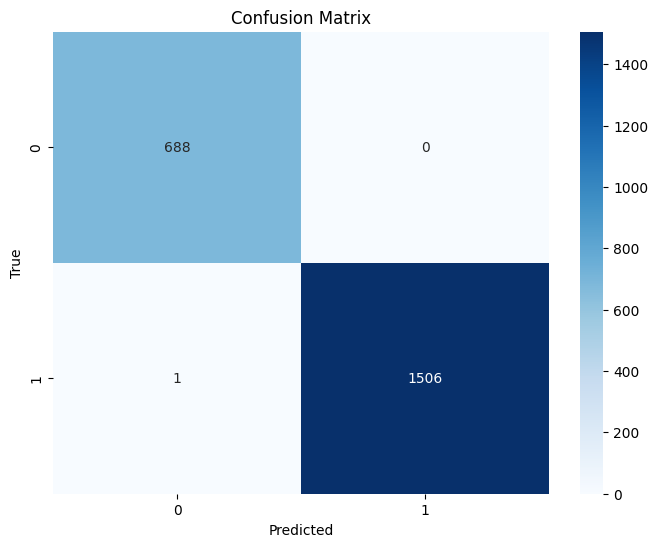


==================Random Forest====================
Accuracy: 0.9991
Precision: 0.9991
Recall: 0.9991
F1 Score: 0.9991


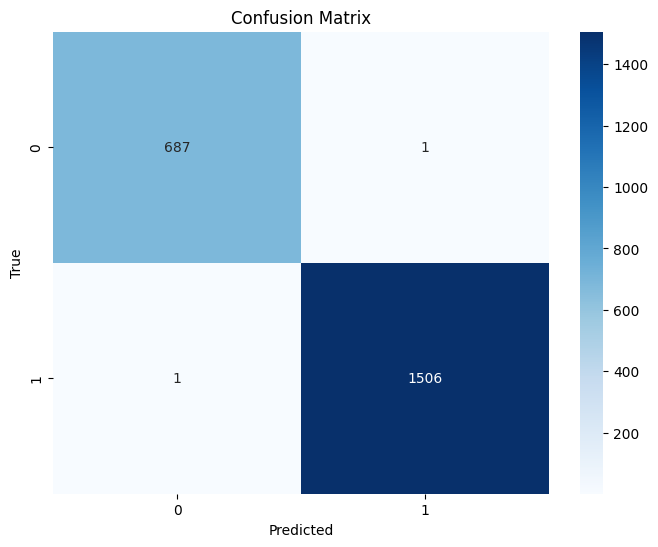


==================Naive Bayes====================
Accuracy: 0.9995
Precision: 0.9995
Recall: 0.9995
F1 Score: 0.9995


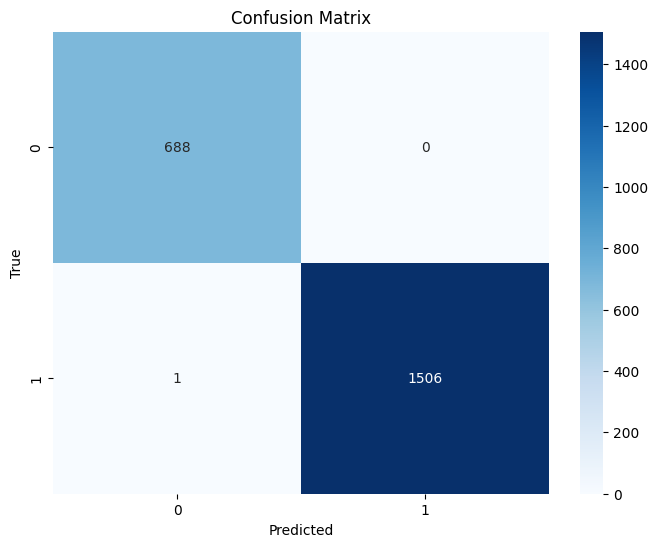

In [161]:
 #creating funnction for accuracy,precision, recall,F1 score and confusion matrix
 #and using it with all the algos

models = [svm,lr,rf,gnb ]
models_name = ['SVM','Logistic Regression','Random Forest','Naive Bayes']
def eval_model(model, X_test, Y_test):     #defining a function 'eval_model()
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Precision, Recall, F1 Score
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(Y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

#usage with all trained models
for i in range(len(models)):
    print(f'=================={models_name[i]}====================')   #for model name
    eval_model(models[i], X_test, Y_test)
    print()

We find that all the models were giving almost similar accuracy values.
But Random trees shows slightly less accuracy than others.

Therefore best models include **SVM**, **Losgistic Regression** and **Naive Bayes models** with a **training accuracy of 100%** & a **validation accuracy of 99.95%**